<a href="https://colab.research.google.com/github/Evgenii1994/DLS/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

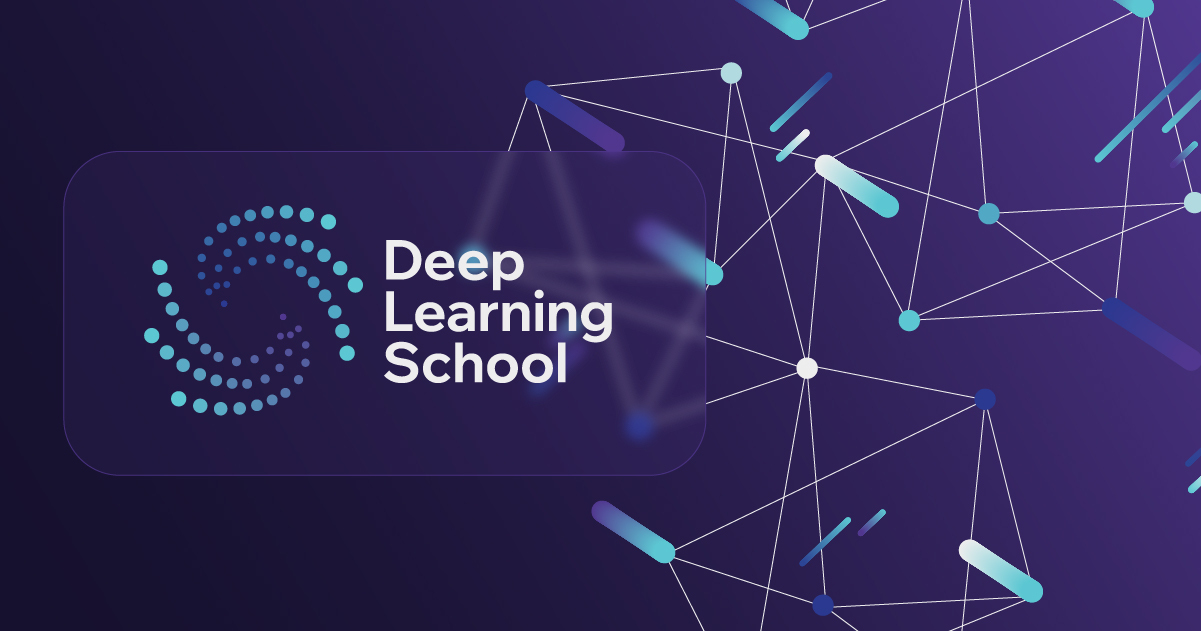

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

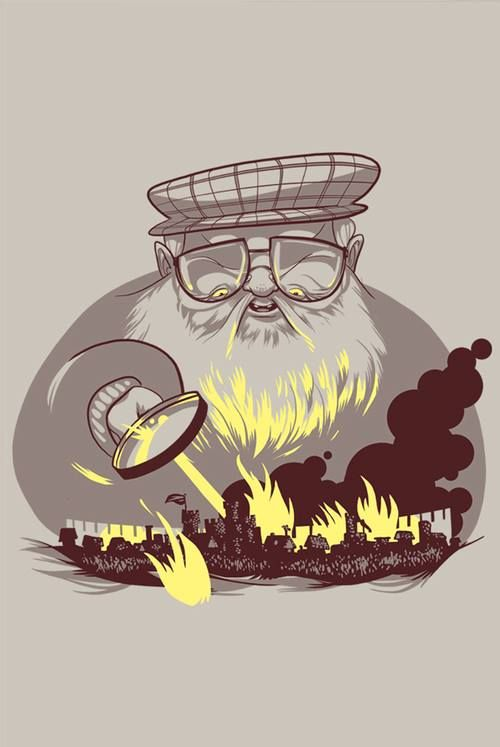

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 45.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 21.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [5]:
!ls -lh

total 180K
-rw-r--r-- 1 root root  37K Sep 29 10:04 game_of_thrones_test.csv
-rw-r--r-- 1 root root 136K Sep 29 10:04 game_of_thrones_train.csv
drwxr-xr-x 1 root root 4.0K Mar  7 14:26 sample_data


In [116]:
data = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')
data_test = pd.read_csv("game_of_thrones_test.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [117]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

data_test['isPopular'] = data_test['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
data_test['boolDeadRelations'] = data_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [118]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
cult = {vv: k for k, v in cult.items() for vv in v}
cult

{'summer islands': 'Summer Islands',
 'summer islander': 'Summer Islands',
 'summer isles': 'Summer Islands',
 'ghiscari': 'Ghiscari',
 'ghiscaricari': 'Ghiscari',
 'ghis': 'Ghiscari',
 "asshai'i": 'Asshai',
 'asshai': 'Asshai',
 'lysene': 'Lysene',
 'lyseni': 'Lysene',
 'andal': 'Andal',
 'andals': 'Andal',
 'braavosi': 'Braavosi',
 'braavos': 'Braavosi',
 'dornishmen': 'Dornish',
 'dorne': 'Dornish',
 'dornish': 'Dornish',
 'myr': 'Myrish',
 'myrish': 'Myrish',
 'myrmen': 'Myrish',
 'westermen': 'Westermen',
 'westerman': 'Westermen',
 'westerlands': 'Westermen',
 'westeros': 'Westerosi',
 'westerosi': 'Westerosi',
 'stormlands': 'Stormlander',
 'stormlander': 'Stormlander',
 'norvos': 'Norvoshi',
 'norvoshi': 'Norvoshi',
 'the north': 'Northmen',
 'northmen': 'Northmen',
 'wildling': 'Free Folk',
 'first men': 'Free Folk',
 'free folk': 'Free Folk',
 'qartheen': 'Qartheen',
 'qarth': 'Qartheen',
 'the reach': 'Reach',
 'reach': 'Reach',
 'reachmen': 'Reach'}

In [119]:
data['culture'] = data['culture'].apply(lambda x: cult.get(str(x).lower(), x))
data_test['culture'] = data_test['culture'].apply(lambda x: cult.get(str(x).lower(), x))

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=[...], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<Axes: xlabel='isAlive'>

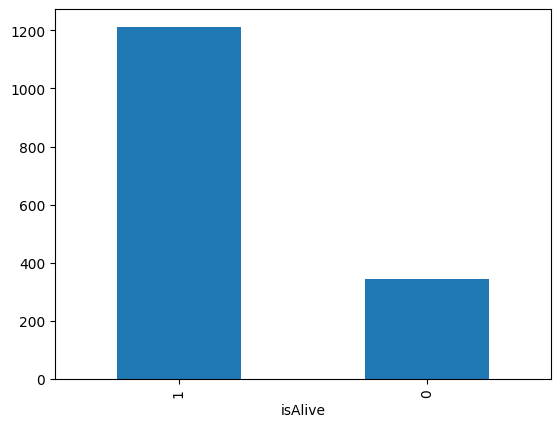

In [80]:
data.isAlive.value_counts().plot(kind='bar')

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [133]:
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_features = X_train.select_dtypes(include=["object", "category"]).columns
bool_features = X_train.select_dtypes(include=["bool"]).columns

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


bool_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features),
    ("bool", bool_transformer, bool_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

Categorical Features:
Index(['name', 'title', 'culture', 'mother', 'father', 'heir', 'house',
       'spouse'],
      dtype='object')

Numerical Features:
Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isPopular', 'boolDeadRelations'],
      dtype='object')


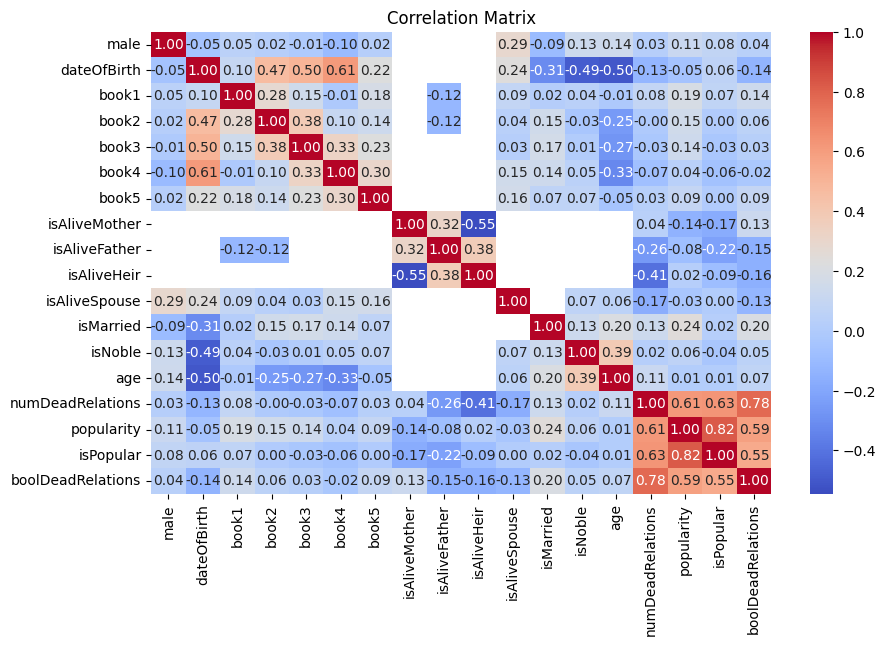

In [129]:
def analyze_features(X):
    num_features = X.select_dtypes(include=["int64", "float64"]).columns
    cat_features = X.select_dtypes(include=["object", "category"]).columns

    print("Categorical Features:")
    print(cat_features)

    print("\nNumerical Features:")
    print(num_features)

    # Correlation matrix for numerical features
    plt.figure(figsize=(10, 6))
    sns.heatmap(X[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

analyze_features(X)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

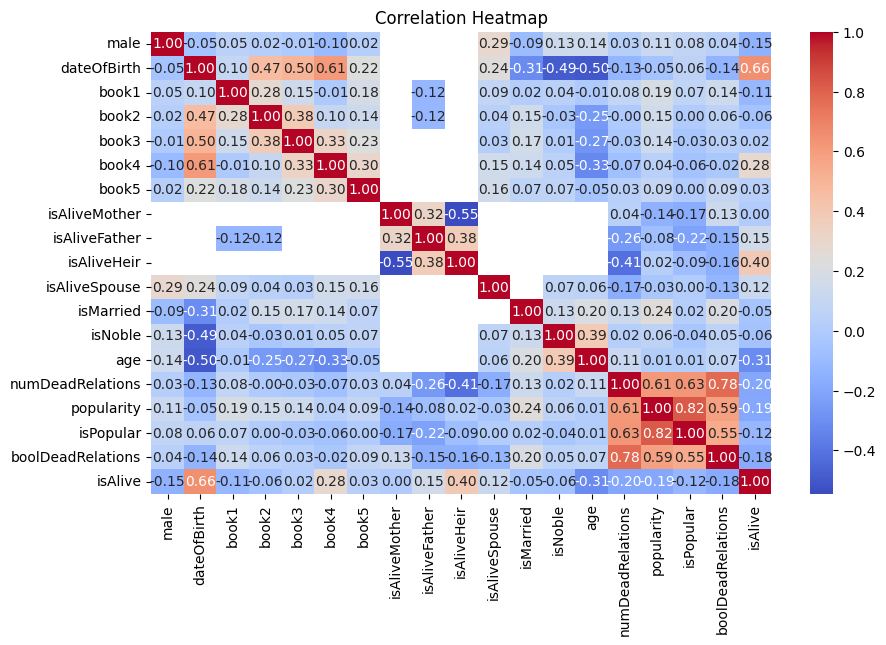

Feature: name, Chi2 p-value: 0.0000
	name significantly influences isAlive
Feature: title, Chi2 p-value: 0.0010
	title significantly influences isAlive
Feature: culture, Chi2 p-value: 0.0000
	culture significantly influences isAlive
Feature: mother, Chi2 p-value: 0.1804
Feature: father, Chi2 p-value: 0.0454
	father significantly influences isAlive
Feature: heir, Chi2 p-value: 0.0775
Feature: house, Chi2 p-value: 0.0000
	house significantly influences isAlive
Feature: spouse, Chi2 p-value: 0.0000
	spouse significantly influences isAlive


In [135]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

def analyze_feature_influence(df, target_col):
    # Ensure target column is boolean
    df[target_col] = df[target_col].astype(bool)

    # Separate numerical and categorical features
    num_features = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Remove target from feature lists
    if target_col in num_features:
        num_features.remove(target_col)
    if target_col in cat_features:
        cat_features.remove(target_col)

    # Correlation analysis for numerical features
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[num_features + [target_col]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

    # Statistical tests for categorical features
    label_enc = LabelEncoder()
    for cat in cat_features:
        if df[cat].nunique() > 1:  # Skip features with a single category
            df[cat] = label_enc.fit_transform(df[cat])
            chi2_stat, p_value = chi2(df[[cat]], df[target_col])
            print(f"Feature: {cat}, Chi2 p-value: {p_value[0]:.4f}")
            if p_value[0] < 0.05:
                print(f"\t{cat} significantly influences {target_col}")

analyze_feature_influence(data, 'isAlive')

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [58]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['isAlive'], axis=1), data['isAlive'], test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [137]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_transformed, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_transformed)

In [138]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [62]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.0 MB/s eta 0:00:00


In [110]:
import optuna
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


def objective(trial, X_train, X_test, y_train, y_test):
    # Define preprocessing steps
    num_features = X_train.select_dtypes(include=["int64", "float64"]).columns
    cat_features = X_train.select_dtypes(include=["object", "category"]).columns
    bool_features = X_train.select_dtypes(include=["bool"]).columns

    num_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    cat_transformer = Pipeline([
      ("imputer", SimpleImputer(strategy="most_frequent")),
      ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
  ])


    bool_transformer = SimpleImputer(strategy="most_frequent")

    preprocessor = ColumnTransformer([
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
        ("bool", bool_transformer, bool_features)
    ])

    # Define classifier selection
    classifier_name = trial.suggest_categorical("classifier", [
        "LogisticRegression", "RandomForest", "AdaBoost",
        "GaussianProcess", "GaussianNB", "KNeighbors",
        "SVC", "DecisionTree"])

    if classifier_name == "LogisticRegression":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", LogisticRegression(
                C=trial.suggest_loguniform("logreg_C", 1e-3, 1e3),
                max_iter=trial.suggest_int("logreg_max_iter", 100, 1000)))
        ])

    elif classifier_name == "RandomForest":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", RandomForestClassifier(
                n_estimators=trial.suggest_int("rf_n_estimators", 10, 200),
                max_depth=trial.suggest_int("rf_max_depth", 2, 32, log=True),
                min_samples_split=trial.suggest_int("rf_min_samples_split", 2, 10)))
        ])

    elif classifier_name == "AdaBoost":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", AdaBoostClassifier(
                n_estimators=trial.suggest_int("ab_n_estimators", 10, 200),
                learning_rate=trial.suggest_loguniform("ab_learning_rate", 1e-3, 1)))
        ])

    elif classifier_name == "GaussianProcess":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", GaussianProcessClassifier())
        ])

    elif classifier_name == "GaussianNB":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", GaussianNB())
        ])

    elif classifier_name == "KNeighbors":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", KNeighborsClassifier(
                n_neighbors=trial.suggest_int("knn_n_neighbors", 1, 20),
                weights=trial.suggest_categorical("knn_weights", ["uniform", "distance"])))
        ])

    elif classifier_name == "SVC":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", SVC(
                C=trial.suggest_loguniform("svc_C", 1e-3, 1e3),
                kernel=trial.suggest_categorical("svc_kernel", ["linear", "rbf"]),
                gamma=trial.suggest_categorical("svc_gamma", ["scale", "auto"])))
        ])

    elif classifier_name == "DecisionTree":
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("clf", DecisionTreeClassifier(
                max_depth=trial.suggest_int("dt_max_depth", 2, 32, log=True),
                min_samples_split=trial.suggest_int("dt_min_samples_split", 2, 10)))
        ])

    # Fit model and evaluate accuracy on test set
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    return score

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['isAlive'], axis=1), data['isAlive'], test_size=0.2, random_state=42)
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, X_train, X_test, y_train, y_test), n_trials=100)

[I 2025-03-11 06:30:50,891] A new study created in memory with name: no-name-bdddfd0e-9c48-4f79-a609-ffba50c03831
[I 2025-03-11 06:30:51,069] Trial 0 finished with value: 0.8044871794871795 and parameters: {'classifier': 'KNeighbors', 'knn_n_neighbors': 12, 'knn_weights': 'distance'}. Best is trial 0 with value: 0.8044871794871795.
[I 2025-03-11 06:30:51,247] Trial 1 finished with value: 0.7916666666666666 and parameters: {'classifier': 'KNeighbors', 'knn_n_neighbors': 18, 'knn_weights': 'distance'}. Best is trial 0 with value: 0.8044871794871795.
[I 2025-03-11 06:30:51,421] Trial 2 finished with value: 0.7980769230769231 and parameters: {'classifier': 'KNeighbors', 'knn_n_neighbors': 12, 'knn_weights': 'uniform'}. Best is trial 0 with value: 0.8044871794871795.
[I 2025-03-11 06:30:51,931] Trial 3 finished with value: 0.7596153846153846 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 103, 'rf_max_depth': 5, 'rf_min_samples_split': 2}. Best is trial 0 with value: 0.804

In [112]:
def remove_first_prefix(params: dict) -> dict:
    return {key.split("_", 1)[-1]: value for key, value in params.items()}

best_params = study.best_trial.params

{'classifier': 'DecisionTree', 'max_depth': 7, 'min_samples_split': 3}

In [113]:
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_features = X_train.select_dtypes(include=["object", "category"]).columns
bool_features = X_train.select_dtypes(include=["bool"]).columns

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


bool_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features),
    ("bool", bool_transformer, bool_features)
])

best_params = study.best_trial.params

from sklearn.base import clone

# Получаем лучший классификатор и его параметры
best_classifier = best_params.pop("classifier")

# Создаем новую модель с лучшими параметрами
model_mapping = {
    "LogisticRegression": LogisticRegression,
    "RandomForest": RandomForestClassifier,
    "AdaBoost": AdaBoostClassifier,
    "GaussianProcess": GaussianProcessClassifier,
    "GaussianNB": GaussianNB,
    "KNeighbors": KNeighborsClassifier,
    "SVC": SVC,
    "DecisionTree": DecisionTreeClassifier,
}

best_clf = model_mapping[best_classifier](**remove_first_prefix(best_params))

# Создаем полный пайплайн
best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", best_clf)
])

# Обучаем модель
best_model.fit(X_train, y_train)

# Сохраняем
joblib.dump(best_model, "best_model.pkl")
print("Best classifier saved as best_model.pkl")


Best classifier saved as best_model.pkl


In [114]:
def predict_new_data(new_data):
    model = joblib.load("best_model.pkl")
    return model.predict(new_data)

In [120]:
y_pred = predict_new_data(data_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [64]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [141]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_transformed)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [121]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 3.85MB/s]


In [122]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [124]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [125]:
submission.to_csv("/content/new_submission.csv", index=False)